# Preparación del entorno

In [1]:
filespaths = ["0.png", "1.png", "1_2.png", "2.png", "3.png", "4.png", "4_2.png", "5.png", "6.png", "7.png", "7_2.png", "8.png", "8_2.png", "9.png"]

# Extraemos las imagenes con las que sera probado la red neuronal.
for file in filespaths:
  url = f"https://raw.githubusercontent.com/Sabers2610/Deep-Learning-E5/refs/heads/main/images/{file}"
  !wget {url}

# Cargamos el modelo para realizar la prueba
!wget https://raw.githubusercontent.com/Sabers2610/Deep-Learning-E5/refs/heads/main/adamax_exp5.h5

--2025-04-20 23:20:20--  https://raw.githubusercontent.com/Sabers2610/Deep-Learning-E5/refs/heads/main/images/0.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1987 (1.9K) [image/png]
Saving to: ‘0.png’

0.png               100%[===================>]   1.94K  --.-KB/s    in 0s      

2025-04-20 23:20:21 (26.9 MB/s) - ‘0.png’ saved [1987/1987]

--2025-04-20 23:20:21--  https://raw.githubusercontent.com/Sabers2610/Deep-Learning-E5/refs/heads/main/images/1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1751 (1.7K) [image/png

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
import numpy as np

def preprocess_image(filepath):
    img = Image.open(filepath).convert('L')
    img = img.resize((28, 28)).copy()
    img = ImageOps.invert(img)
    img_array = np.array(img)
    img_array = img_array.astype("float32") / 255.0
    img_array = img_array.reshape(1, 28 * 28)
    print(img_array, img)
    return img_array, img

In [3]:
model = keras.models.load_model("adamax_exp5.h5")

model.summary()

pesos = model.weights # obtenemos los pesos para verificar si el modelo se encuentra entrenado

if not pesos:
  print("El modelo no ha sido entrenado.")
else:
  print("El modelo posee entrenamiento.")

Model: "adamax_exp5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hide_layer1 (Dense)             │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hide_layer2 (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hide_layer3 (Dense)             │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hide_layer4 (Dense)             │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,052 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

El modelo posee entrenamiento.


In [ ]:
from google.colab import files
files.upload() # cargamos las imagenes al entorno
print("Carga de imagenes completada!")

Saving 0.png to 0.png
Saving 1.png to 1.png
Saving 1_2.png to 1_2.png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving 4.png to 4.png
Saving 4_2.png to 4_2.png
Saving 5.png to 5.png
Saving 6.png to 6.png
Saving 7.png to 7.png
Saving 7_2.png to 7_2.png
Saving 8.png to 8.png
Saving 8_2.png to 8_2.png
Saving 9.png to 9.png
Carga de imagenes completada!


In [4]:
processed_images = []
original_images = []
image_names = []

for filepath in filespaths:
    try:
        arr, img = preprocess_image(filepath)
        processed_images.append(arr)
        original_images.append(img)
        image_names.append(filepath)
    except Exception as e:
        print(f"Error procesando {filepath}: {e}")

X_custom = np.vstack(processed_images)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


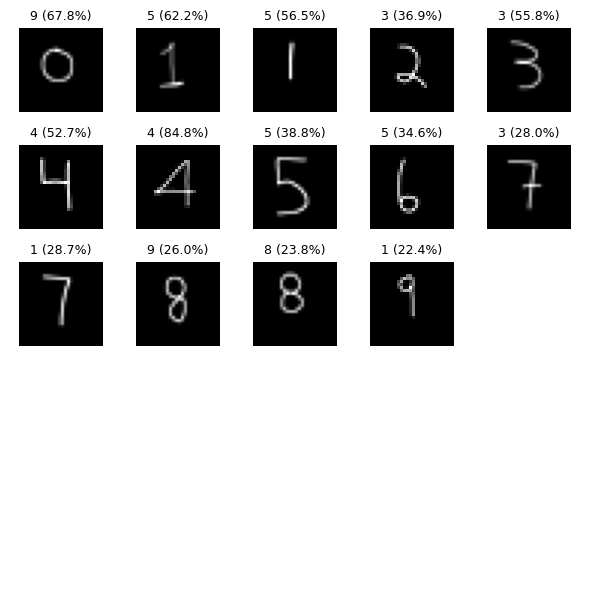

In [5]:
preds = model.predict(X_custom)
pred_labels = np.argmax(preds, axis=1)
confidences = np.max(preds, axis=1)  # precisión (probabilidad más alta)

# --- Mostrar en grilla ---
h, w = 5, 5  # tamaño de la grilla (puede ajustarse)
fig, axs = plt.subplots(h, w, figsize=(1.2*w, 1.2*h))

total = len(original_images)
k = 0  # contador de imagen actual

for i in range(h):
    for j in range(w):
        ax = axs[i, j]

        if k < total:
            ax.imshow(original_images[k], cmap='gray')
            label = pred_labels[k]
            confidence = confidences[k] * 100
            ax.set_title(f"{label} ({confidence:.1f}%)", fontsize=9)
        else:
            ax.axis('off')  # si no hay más imágenes, ocultar

        ax.axis('off')
        k += 1

plt.tight_layout()
plt.show()
